# DSP Lecture Notes 1: Linear Algebra for Signal Processing
$\text{2023 D.J. Lopez | Digital Signals Processing }$

Signals are naturally time-sampled values collected from nature or from any physical entity or observation in the real world. Linear Algebra posits a representation scheme for easy computation, manipulation, and modeling for simple to complex signal processes. In this notebook, we try to understand how linear algebra works as a mathematical tool and a computational tool for analysis. Aside from the mathematical concepts for linearity, vectors, and linear transformation, we will also look at how we could model such mathematics in code. 

An advantage of using software tools for linear algebra or with any applied field of mathematics is that it abstracts the processes or hastens computations so that engineers or scientists can interpret results faster. The use of software-based mathematics could also help develop better intuition in how math works and how it reacts to certain stimuli or as part of a system. In this notebook, we will use Python, specifically the `numpy` library for computation and `matplotlib` for visualization.

The rest of the notebook will be structured as follows:
>1. [Linearity and Vectors](#1.-Linearity-and-Vectors)
>    - [Vectors](#Vectors)
>    - [Matrices](#Matrices)
>2. [Vector Operations](#2.-Vector-Operations)
>    - [Vector Arithmetic](#Vector-Arithmetic)
>    - [Transposition](#Transposition)
>    - [Inner Product](#Inner-Product)
>3. [Vector Norm](#3.-Vector-Norm)
>    - [L1 Norm](#L1-Norm)
>    - [L2 Norm](#L2-Norm)
>5. [Linear Transformations](#4.-Linear-Transformations)
>    - [2D Transformations](#2D-Transformations)
>    - [3D Transformations](#3D-Transformations)
>7. [Orthogonality and Normality](#5.-Orthogonality-and-Normality)


## 1. Linearity and Vectors

The main assumption in linear algebra is that everything that we are working with lines or that we are dealing with the linear properties of an entity in the world. The bottom line is that, in linear algebra, we assume that the objects we are manipulating have a linear component or can be represented by many lines.

The first concept that you would need to get a grasp of is the linear combination. It just simply tells you that for a line $y$ it can be described by several properties $x$ that are either scaled or flipped. 

$$y = a_0x_0 + a_1x_1 + a_2x_2 + ... + a_{n-1}x_{n-1}+ a_nx_n$$ 
$$_{(\text{Eq. 1.1})}$$

One of the most famous linear combinations is the point-slope formula from elementary Geometry

$$y = mx + b$$
$$_{(\text{Eq. 1.2})}$$

Where the slope $m$ is a scalar of some value $x$ while the y-intercept $b$ is the scalar of $x=0$ (the origin).

The idea of doing linear algebra in code is part of computational programming. We take advantage of the logic and arithmetic of linear algebra and code them to apply the theory. We can immediately see the transformation of data and how they are represented.

In this discussion we will be using `numpy` as the main library for computation and `matplotlib` for visualizing the data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(200) ## we set seed numbers to make sure that randomly generated numbers will be the same for everyone.

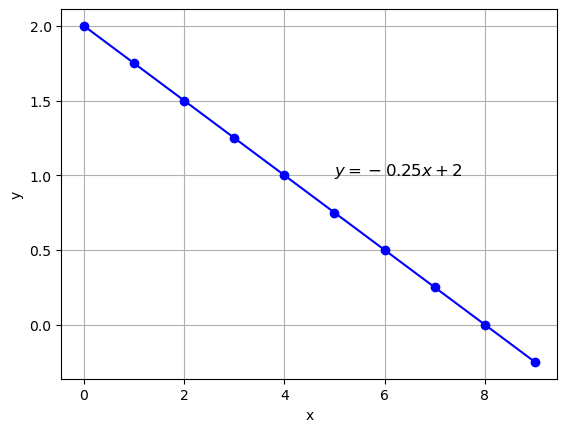

In [8]:
# set sum values of x
X = [0,1,2,3,4,5,6,7,8,9]

## set the slope and intercept
m, b = -0.25, 2

## determine Y using linear combinations of m and b
y = []
for x in X:
    y.append(m*x + b)

plt.plot(X,y, 'bo-')
plt.text(
    int(len(X)/2),int(b/2), ## x and y coordinates of the text
    fr'$y={m}x+{b}$', fontsize=12)

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

### Vectors

If the linear combination of a $y$ would have too many $x$ values it would be a drag to write them in a long line. A more convenient representation of the linear combination is to represent them as a group of numbers. We now consider the concept of inner products where it is simply the sum of products of scalars and $x$.

We first group the scalars and $x$'s by parentheses like so:

$$\hat{a} = \begin{pmatrix} a_0 \\ a_1 \\ a_2 \\ \vdots \\ a_{n-1} \\ a_n \end{pmatrix}, \hat{x} = \begin{pmatrix} x_0 \\ x_1 \\ x_2 \\ \vdots \\ x_{n-1} \\ x_n \end{pmatrix}$$
$$_{(\text{Eq. 1.3})}$$

We now call $\hat{a}$ a vector containing scalars $\hat{a}$ and $\hat{x}$ containing $a$'s and $x$'s respectively. We then get the inner product between $\hat{a}$ and $\hat{x}$ to produce some vector $y$:

$$y = \hat{a} \cdot \hat{x} = \begin{pmatrix} a_0 \\ a_1 \\ a_2 \\ \vdots \\ a_{n-1} \\ a_n \end{pmatrix} \cdot \begin{pmatrix} x_0 \\ x_1 \\ x_2 \\ \vdots \\ x_{n-1} \\ x_n \end{pmatrix} = a_0x_0 + a_1x_1 + a_2x_2 + ... + a_{n-1}x_{n-1} + a_n$$
$$_{(\text{Eq. 1.4})}$$

Vectors are the most fundamental concept in linear algebra. Vectors in the computer science aspect are the collection of **scalars** or numbers; or in the mathematical perspective, these are representations of a point in space. We can mathematically represent vectors as:

$$\mathbf{v} = \begin{pmatrix} a_0 & a_1 & a_2 & ... & a_{n-1} & a_n \end{pmatrix}$$
$$_{(\text{Eq. 1.5})}$$

In [3]:
## Creating a Scalar
scalar = 1
## in numpy
scalar_np = np.array(5)

print(scalar)
print(scalar_np)

1
5


In [4]:
## Creating a vector in numpy
vector = np.array([1,2,3,5,6,7])

print(vector)

[1 2 3 5 6 7]


There are mainly two ways to visualize vectors. The first way is to consider them as line segments, the second is as basis for a continuous line. Let us try to visualize these two ways. For the line segment visualization, this is the usual representation in Physics and engineering for vector analysis. Similar concepts of **vector resultants** are easier to understand in this kind of visualization.

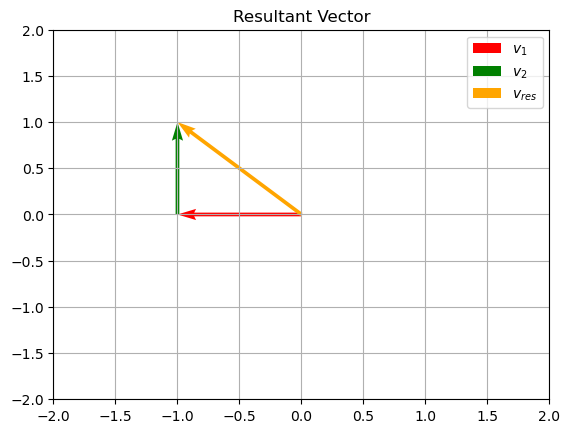

In [21]:
v_1 = np.array([-1,0]) ## first vector
v_2 = np.array([0,1]) ## second vector

plt.title("Resultant Vector")

## the quiver plot plots an arrow corresponding to the coordinates
plt.quiver(
    0,0, 
    v_1[0], v_1[1], 
    angles='xy', scale_units='xy',scale=1, 
    color='red', label=r'$v_1$')
## the first quiver's base is at the origin (0,0) and the tip is at the value of the vector (-1,0)

plt.quiver(
    v_1[0], v_1[1], 
    v_2[0], v_2[1],
    angles='xy', scale_units='xy',scale=1, 
    color='green', label=r'$v_2$')
## the second quiver's base is at the tip of the first vector and the tip is at the value of the second vector plus the first (-1,-1)

v_res = v_1+v_2 ## create a resultant vector

plt.quiver(
    0, 0, 
    v_res[0], v_res[1],
    angles='xy', scale_units='xy',scale=1,
    color='orange', label=r'$v_{res}$')
## the plot of the resultant vector should point to the tip of the second vector.

plt.xlim(-2, 2) ## set the limits of the x-axis
plt.ylim(-2, 2) ## set the limits of the y-axis

plt.legend()
plt.grid() ## show the grid
plt.show()

The other way to visualize vectors is to consider **spans**. The span of a vector can be thought of as a line passing through the values of the vector. The span of a vector is considered to be the set of all possible linear combinations of a vector. This can be best represented as:
$$\text{Span}({v}) = c\cdot \hat{v}$$
Whereas $c$ is a scalar multiplied to the vector $\hat{v}$ such that $c \in \mathbb{R}$. 

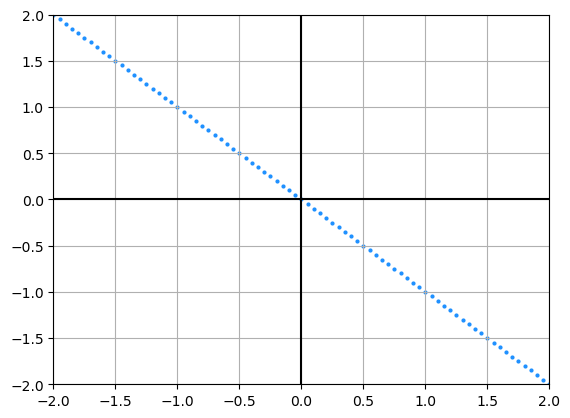

In [33]:
c = np.arange(-10,10,0.05) ## set of scalars defining the span

plt.scatter(c*v_res[0],c*v_res[1], s=4, color='dodgerblue')

plt.xlim(-2,2)
plt.ylim(-2,2)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.show()

### Matrices
Matrices are collections of scalars that could be represented in a lattice-like arrangement with $m$ rows and $n$ columns. It takes on a form like this:
$$\mathbf{M} = \begin{pmatrix} a_{00} & a_{01} & a_{02} & ...  & a_{0n} \\ a_{10} & a_{11} & a_{12} & ... & a_{1n} \\ a_{20} & a_{21} & a_{22} & ... & a_{2n} \\ \vdots & \vdots & \vdots & \ddots & \vdots\\ a_{m0} & a_{m1} & a_{m2} & ... & a_{mn} \end{pmatrix} $$
$$_{(\text{Eq. 1.6})}$$


In [5]:
## Creating a Matrix (elements)
A = np.array([
    [1,2,3],
    [3,1,0],
    [-1,0,2]
])
A

array([[ 1,  2,  3],
       [ 3,  1,  0],
       [-1,  0,  2]])

You can also think that matrices are collections of scaled vectors like this:
$$\mathbf{M} = \begin{pmatrix} a_0 \cdot v_0 \\ a_1 \cdot v_1 \\ \vdots \\ a_n\cdot v_n \end{pmatrix}$$
$$_{(\text{Eq. 1.7})}$$

In [6]:
## Creating a Matrix (vectors)
v1 = np.array([1,2,3])
v2 = np.array([3,2,1])
v3 = np.array([1,-1,-2])
B = np.array([
    2*v1,
    -1*v2,
    0.5*v3
])
B

array([[ 2. ,  4. ,  6. ],
       [-3. , -2. , -1. ],
       [ 0.5, -0.5, -1. ]])

## 2. Vector Operations

Operations on vectors increases the efficiency of computing group of numbers, thus improving signal operations. Vector oprations include arithmetic operations, transposition, and the inner product.

### Vector Arithmetic

Vector arithmetic is the most fundamental operation in vector algebra. The operation for arithmetic is done element-wise thus the assumption for such operations is that the vecotrs are of equal shape. The element-wise and scalar arithmetic can be done in Python such as addition, subtraction, multiplication, division, exponentiation, and even other transcendental transformations.

In [34]:
### Element-wise operations
A = np.array([
    [1,2],
    [-1,0]
])
B = np.array([
    [0,1],
    [1,0]
])

In [41]:
## Addition / Subtraction
print(f'A+B: \n{A+B}\n')
print(f'A-B: \n{A-B}\n')

A+B: 
[[5. 6.]
 [6. 5.]]

A-B: 
[[5. 4.]
 [4. 5.]]



In [43]:
## Multiplication / Division
print(f'A x B: \n{A*B}\n')
print(f'A ./ B: \n{A/B}\n') ## take note this is element-wise division

A x B: 
[[0. 5.]
 [5. 0.]]

A ./ B: 
[[inf  5.]
 [ 5. inf]]



C:\Users\Admin\AppData\Local\Temp\ipykernel_17736\26389042.py:3: RuntimeWarning: divide by zero encountered in divide
  print(f'A ./ B: \n{A/B}\n') ## take note this is element-wise division


In [35]:
### Scalar operations
k = -1
A = np.array([
    [1,-1],
    [2,3]
])
k-A ## Broadcasting

array([[-2,  0],
       [-3, -4]])

In [36]:
### Element-wise vector transformations
f = lambda x: np.exp(x)
g = lambda x: np.log(x)
A = 5*np.ones((2,2))
g(A)

array([[1.60943791, 1.60943791],
       [1.60943791, 1.60943791]])

### Transposition
The transposition operation flips the matrix along its diagonal. In mathematical terms it will for some matrix $\mathbf{M}$ its tranposed form will be $\mathbf{M}^T$:
$$\mathbf{M} = \begin{pmatrix} a_{00} & a_{01} & a_{02} \\ a_{10} & a_{11} & a_{12} \\ a_{20} & a_{21} & a_{22}\end{pmatrix} ; \mathbf{M}^T = \begin{pmatrix} a_{00} & a_{10} & a_{20} \\ a_{01} & a_{11} & a_{21} \\ a_{02} & a_{12} & a_{22}\end{pmatrix}$$

$$_{(\text{Eq. 1.8})}$$

In [45]:
## Transposing a square matrix
M = np.random.randint(1,5,(3,3))
print(f'Original matrix: \n{M}\n')
print(f'Transposed matrix: \n{M.T}\n')

Original matrix: 
[[3 4 2]
 [2 4 3]
 [3 1 2]]

Transposed matrix: 
[[3 2 3]
 [4 4 1]
 [2 3 2]]



In [46]:
## Transposing non-square matrices
N = np.random.randint(2,6,(4,3))
print(f'Original matrix: \n{N}\n')
print(f'Transposed matrix: \n{N.T}\n')

Original matrix: 
[[5 5 5]
 [3 5 3]
 [4 5 3]
 [2 5 4]]

Transposed matrix: 
[[5 3 4 2]
 [5 5 5 5]
 [5 3 3 4]]



In [47]:
## Transposing row/column vectors
v = np.random.randint(2,6,(3,1))
print(f'Original vector: \n{v}\n')
print(f'Transposed vector: \n{v.T}\n')

Original vector: 
[[4]
 [3]
 [2]]

Transposed vector: 
[[4 3 2]]



### Inner Product
The inner product is one of the most important operations in linear algebra. It solves for the linear combination of the vectors and matrices. The inner product is not always commutative. 

The inner product of a matrix can be solved only if the number of columns in the first vector is equal to the number of rows in the second vector. So if the first matrix is $\mathbf{X}$ has a shape of $(m,n)$ and the second matrix is $\mathbf{Y}$ has a shape of $(i,j)$, then you can perform $XY$ if $n=i$. Say for example:

$$X = \begin{bmatrix}x_{(0,0)}&x_{(0,1)}\\ x_{(1,0)}&x_{(1,1)}\end{bmatrix}Y = \begin{bmatrix}y_{(0,0)}&y_{(0,1)}\\ y_{(1,0)}&y_{(1,1)}\end{bmatrix}$$

The dot product will then be computed as:
$$X \cdot Y= \begin{bmatrix} x_{(0,0)}*y_{(0,0)} + x_{(0,1)}*y_{(1,0)} & x_{(0,0)}*y_{(0,1)} + x_{(0,1)}*y_{(1,1)} \\  x_{(1,0)}*y_{(0,0)} + x_{(1,1)}*y_{(1,0)} & x_{(1,0)}*y_{(0,1)} + x_{(1,1)}*y_{(1,1)}
\end{bmatrix}$$

So if we assign values to $X$ and $Y$:
$$X = \begin{bmatrix}1&2\\ 0&1\end{bmatrix}, Y = \begin{bmatrix}-1&0\\ 2&2\end{bmatrix}$$

In [51]:
X = np.array([
    [1,2],
    [0,1]
])
Y = np.array([
    [-1,0],
    [2,2]
])

np.dot(X,Y)

array([[3, 4],
       [2, 2]])

In matrix dot products there are additional rules compared with vector dot products. Since vector dot products were just in one dimension there are less restrictions. Since now we are dealing with Rank 2 vectors we need to consider some rules:

**Rule 1: The inner dimensions of the two matrices in question must be the same.**

So given a matrix $A$ with a shape of $(a,b)$ where $a$ and $b$ are any integers. If we want to do a dot product between $A$ and another matrix $B$, then matrix $B$ should have a shape of $(b,c)$ where $b$ and $c$ are any integers. So for given the following matrices:

$$A = \begin{bmatrix}2&4\\5&-2\\0&1\end{bmatrix}, B = \begin{bmatrix}1&1\\3&3\\-1&-2\end{bmatrix}, C = \begin{bmatrix}0&1&1\\1&1&2\end{bmatrix}$$

So in this case $A$ has a shape of $(3,2)$, $B$ has a shape of $(3,2)$ and $C$ has a shape of $(2,3)$. So the only matrix pairs that is eligible to perform dot product is matrices $A \cdot C$, or $B \cdot C$.  

In [52]:
A = np.array([
    [2, 4],
    [5, -2],
    [0, 1]
])
B = np.array([
    [1,1],
    [3,3],
    [-1,-2]
])
C = np.array([
    [0,1,1],
    [1,1,2]
])
print(A.shape)
print(B.shape)
print(C.shape)

(3, 2)
(3, 2)
(2, 3)


In [53]:
A @ C

array([[ 4,  6, 10],
       [-2,  3,  1],
       [ 1,  1,  2]])

In [54]:
B @ C

array([[ 1,  2,  3],
       [ 3,  6,  9],
       [-2, -3, -5]])

If you would notice the shape of the dot product changed and its shape is not the same as any of the matrices we used. The shape of a dot product is actually derived from the shapes of the matrices used. So recall matrix $A$ with a shape of $(a,b)$ and matrix $B$ with a shape of $(b,c)$, $A \cdot B$ should have a shape $(a,c)$.

In [55]:
A @ B.T

array([[  6,  18, -10],
       [  3,   9,  -1],
       [  1,   3,  -2]])

In [56]:
A @ B

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

And you can see that when you try to multiply A and B, it returns `ValueError` pertaining to matrix shape mismatch.

**Rule 2: Dot Product has special properties**

Dot products are prevalent in matrix algebra, this implies that it has several unique properties and it should be considered when formulation solutions:
 1. $A \cdot B \neq B \cdot A$
 2. $A \cdot (B \cdot C) = (A \cdot B) \cdot C$
 3. $A\cdot(B+C) = A\cdot B + A\cdot C$
 4. $(B+C)\cdot A = B\cdot A + C\cdot A$
 5. $A\cdot I = A$
 6. $A\cdot \emptyset = \emptyset$ 

**Other Examples of Inner Product**

In [48]:
## Row-column inner product
A = np.random.randint(1,10,(1,3)) #(m,n)
B = np.random.randint(1,10,(1,3)) #(i,j)
np.dot(A,B.T) ## (m,j)

array([[75]])

In [49]:
## Non-square inner product
A = np.random.randint(1,10,(2,3))
B = np.random.randint(1,10,(3,2))
print(A)
print(B)
A@B

[[5 3 6]
 [3 5 1]]
[[4 8]
 [9 9]
 [4 2]]


array([[71, 79],
       [61, 71]])

In [50]:
v = np.array([[-1,2]]).T ##[0,1]
A = np.array([
    [0,1],
    [1,0]
])
print(v)
print(A)
A@v

[[-1]
 [ 2]]
[[0 1]
 [1 0]]


array([[ 2],
       [-1]])

### Determinant

A determinant is a scalar value derived from a square matrix. The determinant is a fundamental and important value used in matrix algebra. Although it will not be evident in this laboratory on how it can be used practically, but it will be reatly used in future lessons.

The determinant of some matrix $A$ is denoted as $det(A)$ or $|A|$. So let's say $A$ is represented as:
$$A = \begin{bmatrix}a_{(0,0)}&a_{(0,1)}\\a_{(1,0)}&a_{(1,1)}\end{bmatrix}$$
We can compute for the determinant as:
$$|A| = a_{(0,0)}*a_{(1,1)} - a_{(1,0)}*a_{(0,1)}$$
So if we have $A$ as:
$$A = \begin{bmatrix}1&4\\0&3\end{bmatrix}, |A| = 3$$

But you might wonder how about square matrices beyond the shape $(2,2)$? We can approach this problem by using several methods such as co-factor expansion and the minors method. This can be taught in the lecture of the laboratory but we can achieve the strenuous computation of high-dimensional matrices programmatically using Python. We can achieve this by using `np.linalg.det()`.

In [58]:
A = np.array([
    [1,4],
    [0,3]
])
np.linalg.det(A)

3.0000000000000004

In [59]:
'''
Now other mathematics classes would require you to solve this by hand, 
and that is great for practicing your memorization and coordination skills 
but in this class we aim for simplicity and speed so we'll use programming
but it's completely fine if you want to try to solve this one by hand.
'''
B = np.array([
    [1,3,5,6],
    [0,3,1,3],
    [3,1,8,2],
    [5,2,6,8]
])
np.linalg.det(B)

-235.0

## 3. Vector Norm

The norm of a vector describes its magnitude along a dimension. In calculations in machine learning we often use norms in the first and second dimensions, we call these the L1 and L2 norm. The general formula for the vector norm is called the Frobenius norm:
$$||\mathbf{M}||_n = \Biggl(\sum^N_{i=0}m_i^n\Biggr)^{1/n}$$

In [63]:
## Let's translate the Frobenius norm as code:
def frobenius_norm(n, vector):
    n_sum = np.sum(vector**n)
    vect_norm = np.power(n_sum,1/n)
    return vect_norm

### L1 Norm
The L1 norm is also called the Manhattan distance. Using the Frobenius norm, we set the value of $n$ to 1 signifying the dimensionality as 1. So we get:
$$||\mathbf{M}||_1 = \sum^N_{i=0}m_i$$

In [64]:
def l1_norm(vector):
    vect_norm = np.sum(vector)
    return vect_norm

In [65]:
v = np.array([1,1,2])

## using our l1 function
# l1_norm(v)

## using our frobenius norm function
frobenius_norm(1, v)

4.0

### L2 Norm
The L2 norm or the Euclidean norm, which shows the vector magnitude in the 2D plane. Using the Frobenius norm, we set the value of $n$ to 2 signifying the dimensionality as 2. So we get:
$$||\mathbf{M}||_2 = \Biggl(\sum^N_{i=0}m_i^2\Biggr)^{1/2} = \sqrt{\sum^N_{i=0}m_i^2}$$

In [66]:
def l2_norm(vector):
    n_sum = np.dot(vector, vector)
    vect_norm = np.sqrt(n_sum)
    return vect_norm

In [67]:
v = np.array([1,1,2])
frobenius_norm(2, v)

2.449489742783178

Numpy also provides a library for the Frobenius norm. 
You can check the docs [here](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html)

In [68]:
np.linalg.norm(v,ord=2)

2.449489742783178

## 4. Linear Transformations

You can recall that a vector can be scaled or translated through different vector operations. We'll now dwell more on the translation and transformation of multi-dimensional vectors (i.e. matrices). This is possible using matrix operations. Take note that not all operations to matrices or $\mathbb{R}^2$ vectors are linear. Linear transformations leave the origin fixed and preserve parallelism. Scaling, shearing, rotation and reflexion of a plane are examples of linear transformations.  Let's try to revisit them in this notebook. 

References: <br/>
<a href="https://mmas.github.io/linear-transformations-numpy"> Linear transformations in Numpy </a>

### 2D Transformations

There are two prime requirements for linear geometric translations:
1. Vectors remain linear upon applying the linear function
2. The origin of the vector does not change.

To make representation easier, I have provided a user-defined function for plotting the quivers of the vectors. The function takes in the matrix we wish to transform and a transformation matrix. If no transformation matrix is provided, the default is an identity matrix.

In [69]:
def plot_quiv(x,t_mat=np.eye(2)):
    x_prime = x @ t_mat
    size= (2,2)
    plt.figure(figsize=(4,4))

    plt.xlim(-size[0],size[0])
    plt.ylim(-size[1],size[1])
    plt.xticks(np.arange((-size[0]), size[0]+1, 1.0))
    plt.yticks(np.arange((-size[1]), size[1]+1, 1.0))


    plt.quiver([0,0],[0,0], x_prime[0,:], x_prime[1,:], 
               angles='xy', scale_units='xy',scale=1, 
               color=['red','blue'])## use column spaces
    plt.grid()
    plt.show()

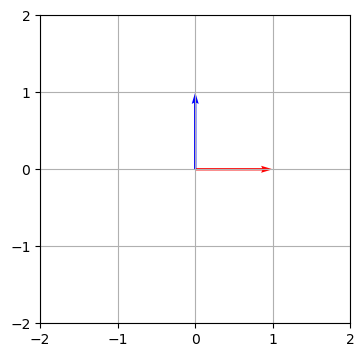

In [70]:
A = np.array([
    [1, 0],
    [0, 1]
])

plot_quiv(A)

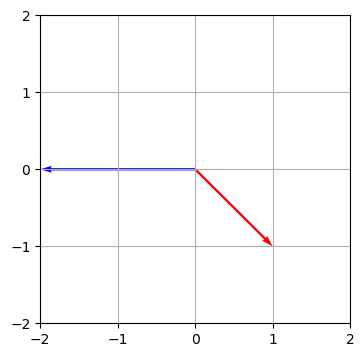

[[ 1 -2]
 [-1  0]]


In [83]:
### Repositioning / Translation

t_mat = np.array([
    [-1,0],
    [0,-1]
]) ### -1 * I ## scalar matrix
B = np.array([
              [-1,2],
              [1,0]
])
plot_quiv(t_mat@B)
print(t_mat@B)

**Translation Matrix**. 
The translation matrix can be considered as a function to transform a vector. It can be modeled as:
$$F_{\text{tranlaste}} = \begin{pmatrix} -1 & 0 \\ 0 & -1\end{pmatrix}$$
Thus if we *apply* the translation onto the vector $B$ we get:
$$B_{\text{translated}} = F_{\text{tranlaste}} \cdot B$$

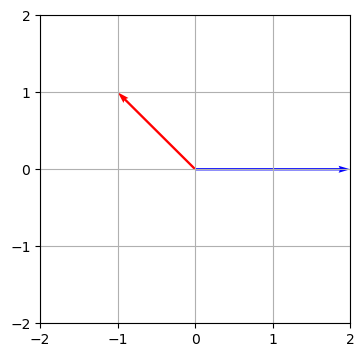

[[-2  4]
 [-3  4]]


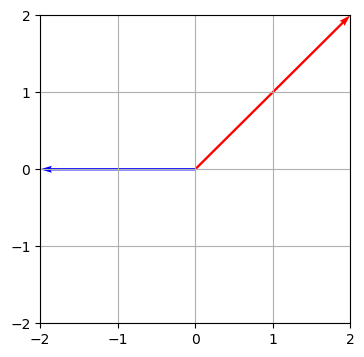

In [84]:
### Shearing

# Transformation Matrices
shear1 = np.array([
    [1,1],
    [1,1]
])
shear2 = np.array([
    [2,0],
    [2,-1]
])
plot_quiv(B)
print(shear2@B)
plot_quiv(B, shear2)


**Shear Matrix**. 
The shear matrix can be considered as a function to transform a vector similar to the translation matrix. It can be modeled as:
$$F_{\text{tranlaste}} = \begin{pmatrix} 1 & 1 \\ 1 & 1\end{pmatrix}$$
Thus if we *apply* the translation onto the vector $B$ we get:
$$B_{\text{sheared}} = F_{\text{shear}} \cdot B$$

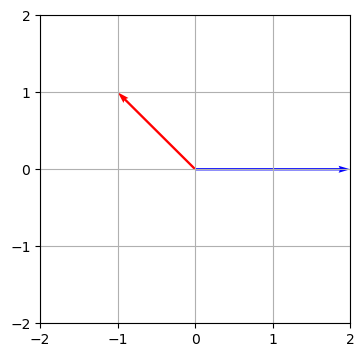

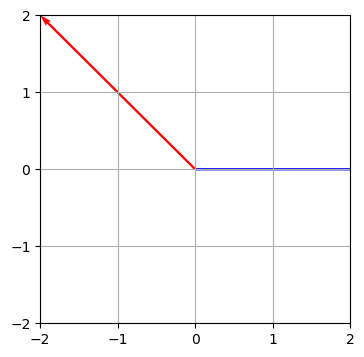

In [74]:
### Scaling

scale = np.array([
    [2,0],
    [0,2]
])

# scale2 = 0.5*np.eye(2)

plot_quiv(B)
plot_quiv(B, scale)

**Scaling Matrix/ Scalar Matrix**. 
A scalar matrix is similar to a simple scalar operation which can be modeled as:
$$F_{\text{scale}} = s \cdot \begin{pmatrix} 1 & 0 \\ 0 & 1\end{pmatrix} = s\cdot I$$
Thus if we *apply* the translation onto the vector $B$ we get:
$$B_{\text{scaled}} = F_{\text{scale}} \cdot B$$

In [77]:
### Rotations
def rot_matrix(theta):
    theta = np.deg2rad(theta)
    rot_mat = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])
    return rot_mat

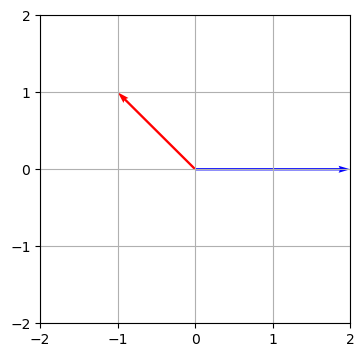

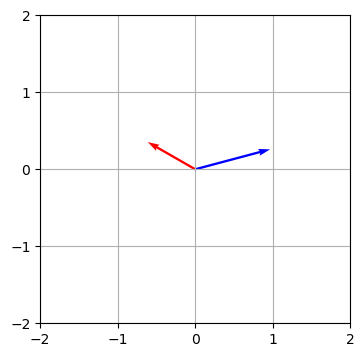

In [78]:
rotate = rot_matrix(15)
plot_quiv(B)
scale = 0.5*np.eye(2)
plot_quiv(scale@rotate@B)

**Rotation Matrix**. 
One of the most useful transformation matrices is the rotation matrix since it is parametric similar to the scalar matrix.
$$F_{\text{rotation}}(\theta) = \begin{pmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta)\end{pmatrix}$$
Thus if we *apply* the translation onto the vector $B$ we get:
$$B_{\text{rotated}} = F_{\text{rotation}}(\theta) \cdot B$$

### 3D Transformations

Matrices with three feature or variables can be represented by matrices with three columns. Rotation transformations are best seen in these types of matrices where as these three dimensions could be represented as `yaw`, `pitch`, and `roll` of a certain object (e.g. drones, planes, etc.)

In [79]:
def plot_3d_quiv(x, azimuth=0, elevation=0):
    fig = plt.figure(figsize=(8,8))
    ax1 = fig.add_subplot(projection='3d')
    ax1.set_xlim([-2, 2])
    ax1.set_ylim([-2, 2])
    ax1.set_zlim([-2, 2])
    ax1.set_xlabel("X (roll)")
    ax1.set_ylabel("Y (pitch)")
    ax1.set_zlabel("Z (yaw)")

    origin = (0,0,0)
    ax1.quiver(origin, origin, origin, x[0,:], x[1,:], x[2,:], 
               arrow_length_ratio=0.1, colors=['red','blue','green'])
    plt.grid()
    ax1.view_init(azim=azimuth, elev=elevation)        
    plt.show()

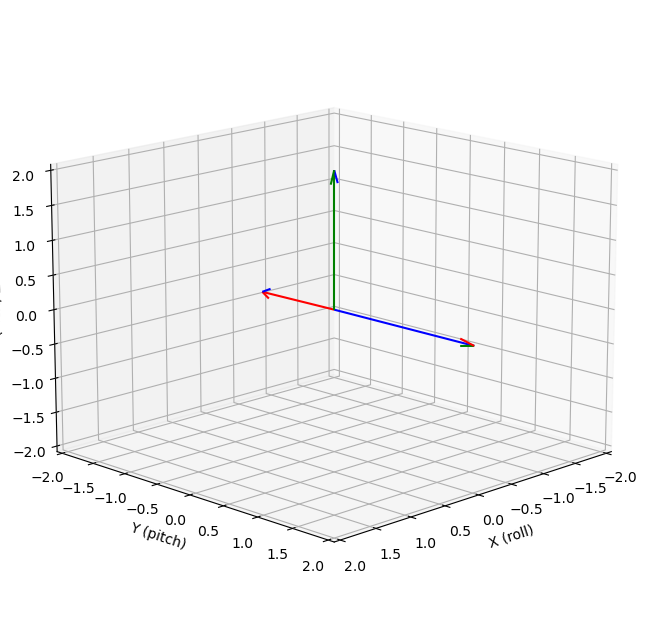

In [80]:
X = np.eye(3)
t_mat = np.array([
    [2,0,0],
    [1,2,0],
    [1,0,2]
])
plot_3d_quiv(t_mat@X, 45, 15)

However, since the matrix has increased dimensions we would need to modify the rotation matrix $\text{Eq. 1.}$. We would need to apply as a rotation matrix for each of the component or variable spaces of the matrix (`yaw`, `pitch`, and `roll`.) We represent the rotation matrix here as $R$.

$$R_{\text{roll}}(\theta_{\text{roll}})= \begin{pmatrix} 1 & 0 & 0 \\ 0& \cos{\theta_{\text{roll}}}& -\sin{\theta_{\text{roll}}} \end{pmatrix}$$

In [81]:
def rot_matrix_3d(roll, pitch, yaw):
    alpha = [np.deg2rad(roll), np.deg2rad(pitch), np.deg2rad(yaw)]
    roll = np.array([
        [1,0,0],
        [0, np.cos(alpha[0]), -np.sin(alpha[0])],
        [0, np.sin(alpha[0]), np.cos(alpha[0])]
    ])
    pitch = np.array([
        [np.cos(alpha[1]), 0, np.sin(alpha[1])],
        [0 ,1 ,0],
        [-np.sin(alpha[1]), 0, np.cos(alpha[1])]
    ])
    yaw = np.array([
        [np.cos(alpha[2]), -np.sin(alpha[2]), 0],
        [np.sin(alpha[2]), np.cos(alpha[2]), 0],
        [0,0,1]
    ])
    res = roll @ pitch @ yaw
    return roll, pitch, yaw, res

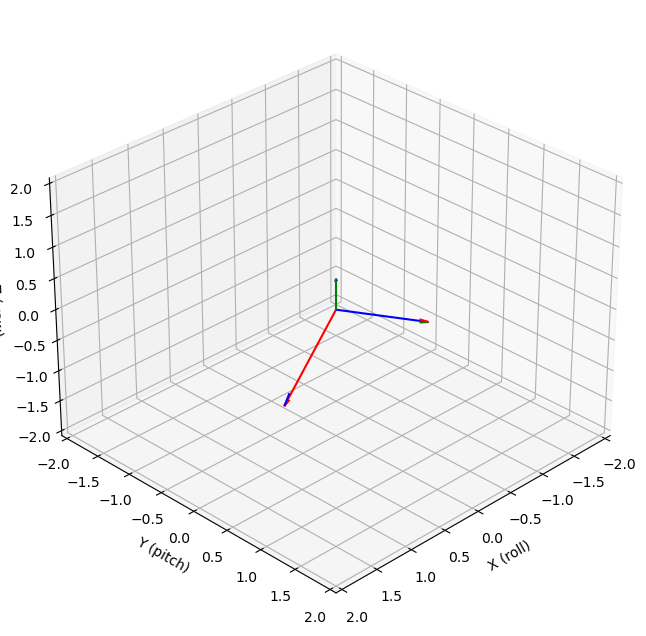

In [82]:
r_x, r_y, r_z, r_mat = rot_matrix_3d(roll=0,pitch=0,yaw=30)
M = np.array([
    [2,0,0],
    [0,1,0],
    [0,0,0.5]
])
# scale = 1.5*np.eye(3)
plot_3d_quiv(r_mat@M, 45,30)

## 5. Orthogonality and Normality